In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw_sales.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
customer_df = df.groupby("Customer ID").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Discount": "mean",
    "Order ID": "count"
}).reset_index()

customer_df.rename(columns={"Order ID": "Total_Orders"}, inplace=True)
customer_df.head()

,Customer ID,Sales,Profit,Discount,Total_Orders
0,AA-10315,5563.560,-362.8825,0.090909,11
1,AA-10375,1056.390,277.3824,0.080000,15
2,AA-10480,1790.512,435.8274,0.016667,12
3,AA-10645,5086.935,857.8033,0.063889,18
4,AB-10015,886.156,129.3465,0.066667,6


In [3]:
(customer_df["Profit"] < 0).sum()

np.int64(155)

In [4]:
top_customers = customer_df.sort_values("Profit", ascending=False).head(10)
worst_customers = customer_df.sort_values("Profit").head(10)

top_customers

,Customer ID,Sales,Profit,Discount,Total_Orders
741,TC-20980,19052.218,8981.3239,0.116667,12
621,RB-19360,15117.339,6976.0959,0.094444,18
669,SC-20095,14142.334,5757.4119,0.063636,22
327,HL-15040,12873.298,5622.4292,0.018182,11
6,AB-10105,14473.571,5444.8055,0.240000,20
730,TA-21385,14595.620,4703.7883,0.080000,10
160,CM-12385,8954.020,3899.8904,0.120000,10
424,KD-16495,8181.256,3038.6254,0.087500,28
48,AR-10540,6608.448,2884.6208,0.066667,9
234,DR-12940,8350.868,2869.0760,0.153846,13


In [5]:
worst_customers

,Customer ID,Sales,Profit,Discount,Total_Orders
180,CS-12505,5690.055,-6626.3895,0.200000,9
310,GT-14635,9351.212,-4108.6589,0.250000,6
459,LF-17185,3930.509,-3583.9770,0.318750,16
711,SR-20425,3233.481,-3333.9144,0.366667,9
322,HG-14965,3247.642,-2797.9635,0.170588,17
555,NC-18415,2218.990,-2204.8072,0.264286,14
666,SB-20290,8057.891,-2082.7451,0.241176,17
700,SM-20320,25043.050,-1980.7393,0.246667,15
165,CP-12340,5888.275,-1850.3029,0.213333,15
560,NF-18385,8322.826,-1695.9714,0.250000,14


In [9]:
customer_df.shape

(793, 5)

In [10]:
abusers = customer_df[
    (customer_df["Profit"] < 0) &
    (customer_df["Discount"] >= 0.20)
]

abusers.shape

(100, 5)

In [11]:
abusers.sort_values("Profit").head(10)

,Customer ID,Sales,Profit,Discount,Total_Orders
310,GT-14635,9351.212,-4108.6589,0.250000,6
459,LF-17185,3930.509,-3583.9770,0.318750,16
711,SR-20425,3233.481,-3333.9144,0.366667,9
555,NC-18415,2218.990,-2204.8072,0.264286,14
666,SB-20290,8057.891,-2082.7451,0.241176,17
700,SM-20320,25043.050,-1980.7393,0.246667,15
165,CP-12340,5888.275,-1850.3029,0.213333,15
560,NF-18385,8322.826,-1695.9714,0.250000,14
738,TB-21520,4737.486,-1603.0451,0.265000,20
199,DC-12850,3336.168,-1441.6313,0.211111,18


In [12]:
def customer_segment(profit):
    if profit > 0:
        return "Profitable"
    elif profit >= -100:
        return "Low Margin"
    else:
        return "Loss Making"

customer_df["Segment"] = customer_df["Profit"].apply(customer_segment)
customer_df["Segment"].value_counts()

Segment
Profitable     638
Loss Making    101
Low Margin      54
Name: count, dtype: int64

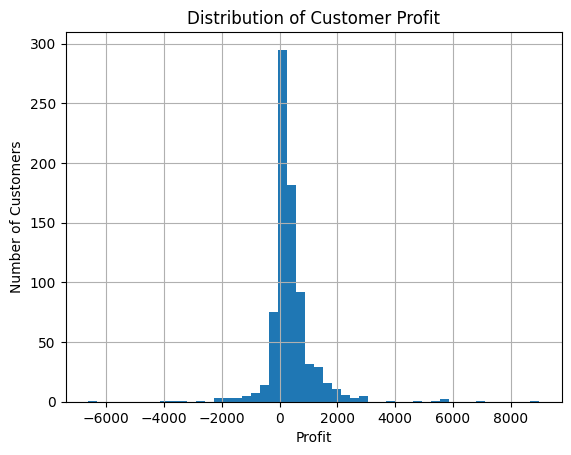

In [13]:
import matplotlib.pyplot as plt

customer_df["Profit"].hist(bins=50)
plt.title("Distribution of Customer Profit")
plt.xlabel("Profit")
plt.ylabel("Number of Customers")
plt.show()

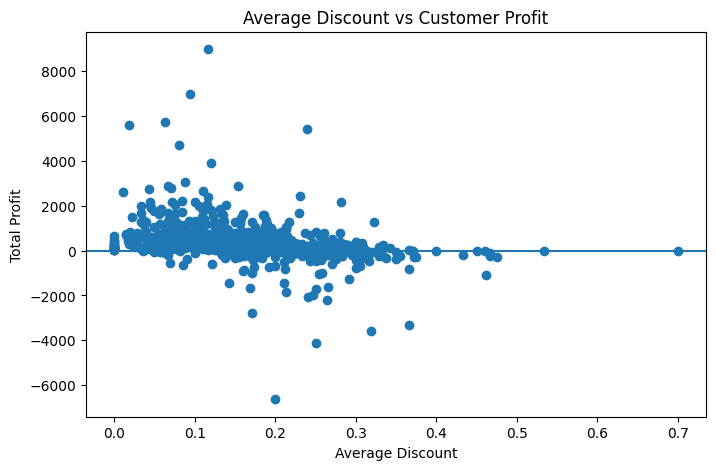

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(customer_df["Discount"], customer_df["Profit"])
plt.axhline(0)
plt.title("Average Discount vs Customer Profit")
plt.xlabel("Average Discount")
plt.ylabel("Total Profit")
plt.show()

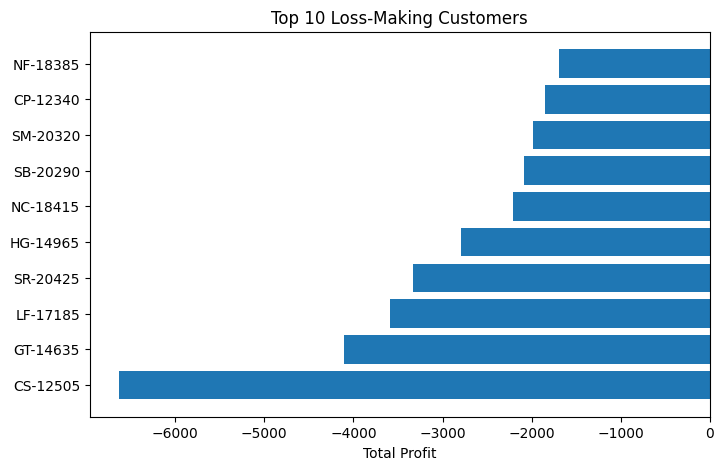

In [15]:
worst_customers = customer_df.sort_values("Profit").head(10)

plt.figure(figsize=(8,5))
plt.barh(worst_customers["Customer ID"], worst_customers["Profit"])
plt.title("Top 10 Loss-Making Customers")
plt.xlabel("Total Profit")
plt.show()